### NAME : S.Sanjith

### ID NO : 190562G

### COURSE CODE : EN2550

In [1]:
# imports
import numpy as np
from show_images import *

im_dir = r'E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Time/Exercises/images/templeSparseRing/'

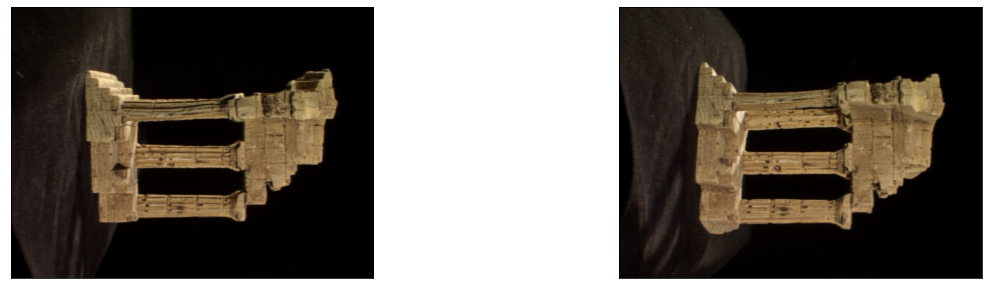

In [2]:
# q1

f = open('E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Time/Exercises/Exercise 08/templeSparseRing/templeSR_par.txt', 'r')              
assert f is not None 

n = int(f.readline())                                                    
l    = f.readline().split()                                              
im1_fn = l[0] 

K1 = np.array( [float(i) for i in l[1:10] ]) .reshape((3,3))             
R1 = np.array( [float(i) for i in l[10:19] ]) .reshape((3,3))            
t1 = np.array( [float(i) for i in l[19:22] ]) .reshape((3,1))  

l    = f.readline().split()                                              
im2_fn = l[0]    

K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))                
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))               
t2 = np.array( [float(i) for i in l[19:22]]) .reshape((3,1))

im1 = cv.imread(im_dir + im1_fn, cv. IMREAD_COLOR)
im2 = cv.imread(im_dir + im2_fn, cv.IMREAD_COLOR) 
 
assert im1 is not None                                                   
assert im2 is not None                                                   

show_images(([im1],[im2]),size=10)

In [9]:
sift=cv.xfeatures2d.SIFT_create()
kp1,desc1=sift.detectAndCompute(im1,None)
kp2,desc2=sift.detectAndCompute(im2,None)

FLANN_INDEX_KDTREE=1
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_parms=dict(checks=100)

flann=cv.FlannBasedMatcher(index_params,search_parms)
mathes=flann.knnMatch(desc1,desc2,k=2)

good=[]
pts1=[]
pts2=[]

for i,(m,n) in enumerate(mathes):
    if m.distance < 0.7*n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1=np.array(pts1)
pts2=np.array(pts2)

F,mask=cv.findFundamentalMat(pts1,pts2,cv.FM_RANSAC)

F

array([[ 5.89765040e-07,  2.55977675e-06, -3.07847061e-02],
       [ 5.16444015e-06, -3.34348162e-07, -1.30738862e-03],
       [ 2.85158915e-02, -2.54311096e-03,  1.00000000e+00]])

In [10]:
# q2

E= K2.T @ F @ K1

E

array([[ 1.36331040e+00,  5.93862667e+00, -4.55731937e+01],
       [ 1.19813894e+01, -7.78486500e-01,  2.61515449e-01],
       [ 4.55650723e+01, -2.82563077e+00, -2.64674836e-02]])

In [11]:
# q3

retval,R,t,mask=cv.recoverPose(E,pts1,pts2,K1)

R,t

(array([[ 0.99826042, -0.05777675,  0.01174636],
        [ 0.04903617,  0.92422894,  0.37867708],
        [-0.03273505, -0.37744234,  0.92545432]]),
 array([[-0.00569716],
        [-0.96706609],
        [ 0.25446163]]))

In [12]:
# q4

R_t_1 = np.concatenate((R1,t1),axis=1) # 3 x 4
R2_ = R1 @ R
t2_ = R1 @ t
R_t_2 = np.concatenate((R2_,t2_),axis=1) # 3 x 4

P1=K1 @ np.hstack((R1,t1))
P2_ = K2 @ R_t_2

P2_

array([[ 1.37272214e+02,  1.54398361e+03,  1.68668227e+01,
        -1.53842049e+03],
       [ 1.53529340e+03, -8.64436821e+01, -1.57217307e+02,
         1.17716361e+01],
       [ 7.20016242e-02,  2.00078075e-01, -9.77130764e-01,
        -7.46128592e-02]])

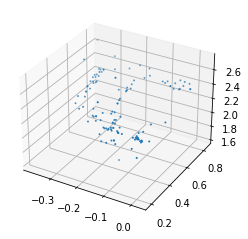

In [13]:
# q5

points4d = cv.triangulatePoints(P1,P2_,pts1.T,pts2.T)
points4d /= points4d[3,:]

X=points4d[0,:]
Y=points4d[1,:]
Z=points4d[2,:]

fig=plt.figure(1)
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X,Y,Z,s=1,cmap='gray')

plt.show()